
$$\require{mhchem}$$       

# Non-isothermal PFR

The gas-phase oxidation of o-xylene to phthalic anhydride is highly exothermic.  The reaction is carried out PFR bundles with molden salt circulating as the heat transfer fluid.  The o-xylene is mixed with air before entering the PFR. The reaction rate is limited by maintaining a low concentration of hydrocarbon in the feed. The mol fraction of o-xylene is less than 2%.  
\begin{align}
o-xylene \rightarrow phthalic anhydride 
\end{align}

Under these conditions, the large excess of oxygen leads to a pseudo-first-order rate expression:
$$
\begin{align}
r=k_m \exp \left[-E\left(\frac{1}{T}-\frac{1}{T_m}\right)\right] c_x 
\end{align}
$$

where $c_x$ is the o-xylene concetration.  The operating pressure is atmospheric.  

| Parameter   | Value                  | Units        |
|-------------|------------------------|--------------|
| $k_m$       | 2.0822                 | 1/s          |
| $T_A$       | 625                    | K            |
| $T_m$       | 625                    | K            |
| $P_f$       | 1.0                    | atm          |
| l           | 1.5                    | m            |
| R           | 0.0125                 | m            |
| $\hat{C}_p$ | 0.992                  | kJ/kg K      |
| U           | 0.373                  | kJ/m$^2$ s K |
| $y_{xf}$      | 0.019                  |              |
| E/R         | $1.3636\times 10^4$    | K            |
| $\Delta H_R$ | $-1.284 \times 10^6$   | kJ/mol       |
| $Q\rho$     | $2.6371\times 10^{-3}$ | kg/s         |

$y_{xf}$ is the mol fraction of xylene in the feed. The rest is inert.  The specific heat is constant.  $T_m$ is the reference temperature. $T_a$ is the temperature of the coolant.  The average molecular weight of the inlet feed is 30.387 kg/kmol.

### Calculate the temperature and o-xylene composition profiles for inlet feed temperatures of 610 to 630 K.

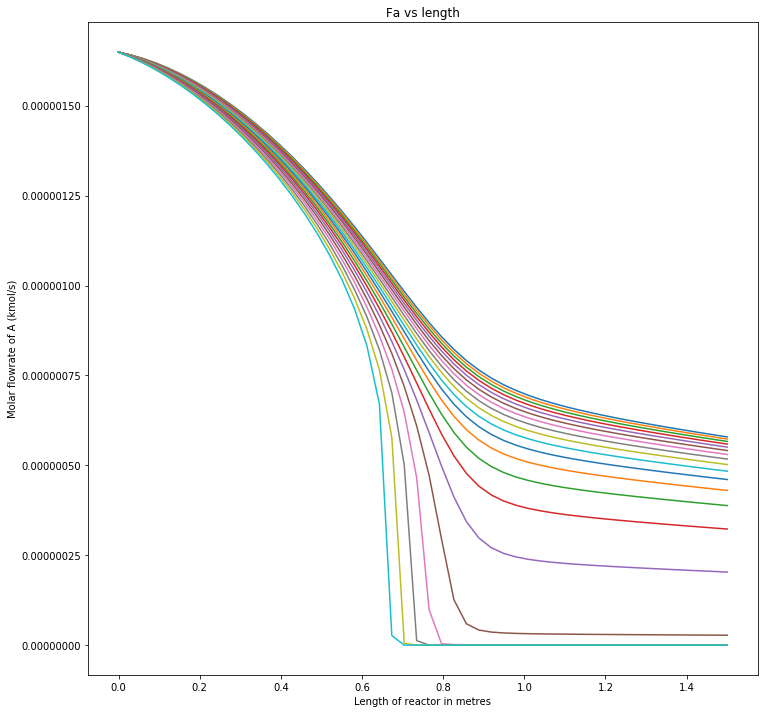

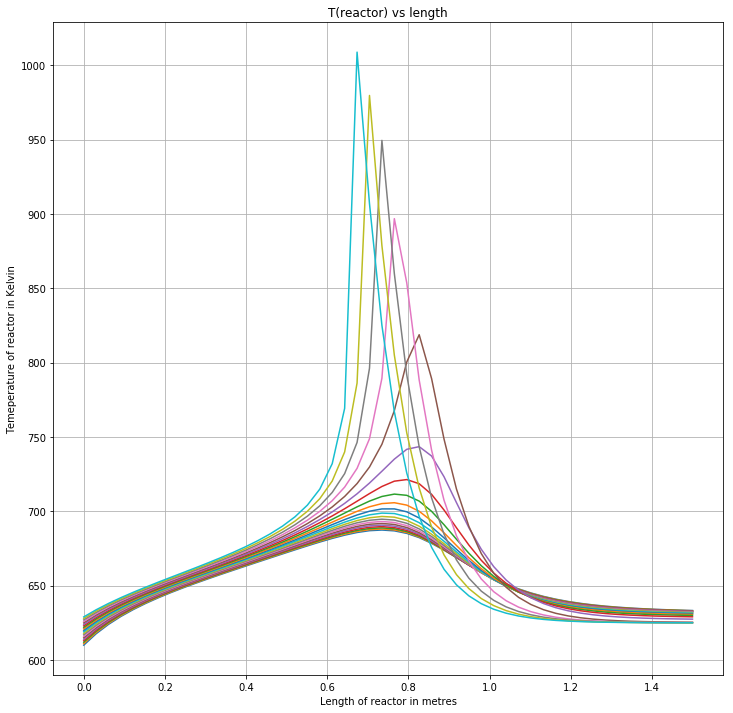

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

km = 2.0822 #1/s
Ta = 625 #K
Tm = 625 #K
Pf = 101.325 #Kpa
L = 1.5 #m
R = 0.0125 #m
CA = np.pi*R*R #cross section area of PFR #m^2
V = CA*L #Volume of pfr #m^3
Cp = 0.992 #kJ/kgK
U = 0.373 #kJ/m2s
yxf = 0.019
E_R = 1.3636*10**4 #K
dHrxn0 = -1.284*10**6 #kJ/kmol
Q_rho = 2.6371/1000 #kg/s
MW = 30.387 #kg/kmol

# a is o-xylene and b is phthalic anhydride, while i is inert, which is air in this case

#Inlet quantities:
Fin = Q_rho/MW #kmol/s
Fain = yxf*Fin #kmol/s
Fbin = 0
Fi = Fin - Fain #kmol/s
Rgas = 8.314

def noniso_PFR(Y,V,Tf):
    Fa,Fb,T = Y #unpacking variables
    #P = y * Pf #Pressure variation along V
    F = Fa + Fb + Fi #kmol/s #total molar flowrate
    v0 = Fin*Rgas*Tf/Pf
    v = v0*(F/Fin)*T/Tf

    #concentration
    Ca = Fa/v
    Cb = Fb/v
    
    #Temperature dependent paramenters
    #dHrxn = dHrxn0 + (Cp - Cp) * (T - Tm)
    k = km * np.exp(-E_R * (1.0 / T - 1.0 / Tm))
    Qdot = U*(2/R) * (Ta - T)
    
    #Reaction parameters
    r = k * Ca
    ra = -r
    rb = r
    
    #Differential equations:
    dFadV = ra
    dFbdV = rb
    dTdV = (-dHrxn0 * r + Qdot) /(Q_rho*Cp)
    #dydV = -alpha /(2 * y) * F / Fin
    #Number of variables unpacked by the first argument to the function should be equal to the number of differential equations returned
    
    return [dFadV, dFbdV, dTdV] #,dydV]

Tf = 610
Vspan = np.linspace(0,V)
Yinit = [Fain,0,Tf]
i=0
width =12
height = 12
for Tf in range(610, 630):
    Yinit = [Fain,0,Tf]
    sol = odeint(noniso_PFR,Yinit,Vspan,args=(Tf,))
    plt.figure(1,figsize = (height,width))
    plt.grid()
    plt.plot(Vspan/CA,sol[:,0])
    plt.ylabel("Molar flowrate of A (kmol/s)")
    plt.xlabel("Length of reactor in metres")
    plt.title("Fa vs length")

    plt.figure(2,figsize = (height,width))
    plt.plot(Vspan/CA,sol[:,2])
    plt.grid()
    plt.ylabel("Temeperature of reactor in Kelvin")
    plt.xlabel("Length of reactor in metres")
    plt.title("T(reactor) vs length")
plt.grid()
plt.show()

plt.show()
    
    

###  What is the maximum feed temperature that can be used that keeps the maximum reactor temperature below 700 K?

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

km = 2.0822 #1/s
Ta = 625 #K
Tm = 625 #K
Pf = 101.325 #Kpa
L = 1.5 #m
R = 0.0125 #m
CA = np.pi*R*R #cross section area of PFR #m^2
V = CA*L #Volume of pfr #m^3
Cp = 0.992 #kJ/kgK
U = 0.373 #kJ/m2s
yxf = 0.019
E_R = 1.3636*10**4 #K
dHrxn0 = -1.284*10**6 #kJ/kmol
Q_rho = 2.6371/1000 #kg/s
MW = 30.387 #kg/kmol

# a is o-xylene and b is phthalic anhydride, while i is inert, which is air in this case

#Inlet quantities:
Fin = Q_rho/MW #kmol/s
Fain = yxf*Fin #kmol/s
Fbin = 0
Fi = Fin - Fain #kmol/s
Rgas = 8.314

def noniso_PFR(Y,V,Tf):
    Fa,Fb,T = Y #unpacking variables
    #P = y * Pf #Pressure variation along V
    F = Fa + Fb + Fi #kmol/s #total molar flowrate
    v0 = Fin*Rgas*Tf/Pf
    v = v0*(F/Fin)*T/Tf

    #concentration
    Ca = Fa/v
    Cb = Fb/v
    
    #Temperature dependent paramenters
    #dHrxn = dHrxn0 + (Cp - Cp) * (T - Tm)
    k = km * np.exp(-E_R * (1.0 / T - 1.0 / Tm))
    Qdot = U*(2/R) * (Ta - T)
    
    #Reaction parameters
    r = k * Ca
    ra = -r
    rb = r
    
    #Differential equations:
    dFadV = ra
    dFbdV = rb
    dTdV = (-dHrxn0 * r + Qdot) /(Q_rho*Cp)
    #dydV = -alpha /(2 * y) * F / Fin
    #Number of variables unpacked by the first argument to the function should be equal to the number of differential equations returned
    
    return [dFadV, dFbdV, dTdV] #,dydV]

Tf = 610
Vspan = np.linspace(0,V)
Yinit = [Fain,0,Tf]
i=0
width =12
height = 12
for i,Tf in enumerate(np.linspace(610, 630)):
    Yinit = [Fain,0,Tf]
    sol = odeint(noniso_PFR,Yinit,Vspan,args=(Tf,))
    Tarray = sol[:,2]
    if np.amax(Tarray)>700:
        break
        
print("The maximum feed temperature at which the reactor temperature does not exceed 700 K is {0:1.4f}".format(Tf),"K")
    

The maximum feed temperature at which the reactor temperature does not exceed 700 K is 619.7959 K


### We learn that the reaction is reversible.  Calculate the equilibrium constant as a function of temperature from 625 to 800 K on a y-log scale

The reference equilibrium constant at 625 K is $10^8$.  

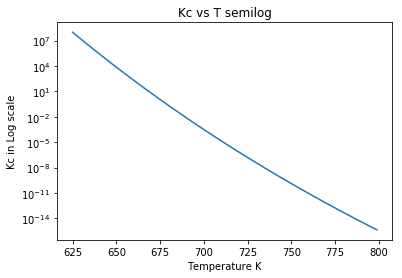

In [3]:
Kc0 = 10**8
i = 0
Trange = range(625,800)
Kc = []
for T in Trange:
    kc = Kc0 * np.exp(-dHrxn0 / Rgas * ( 1.0 / T - 1.0 / 625))
    Kc.append(kc)
    

plt.semilogy(Trange,Kc)

plt.xlabel("Temperature K")
plt.ylabel("Kc in Log scale")
plt.title("Kc vs T semilog")
plt.show()

### Calculate the temperature and o-xylene composition profile for this reversible scenario for inlet feed temperatures of 610 to 630 K.  Explain what's happening.  

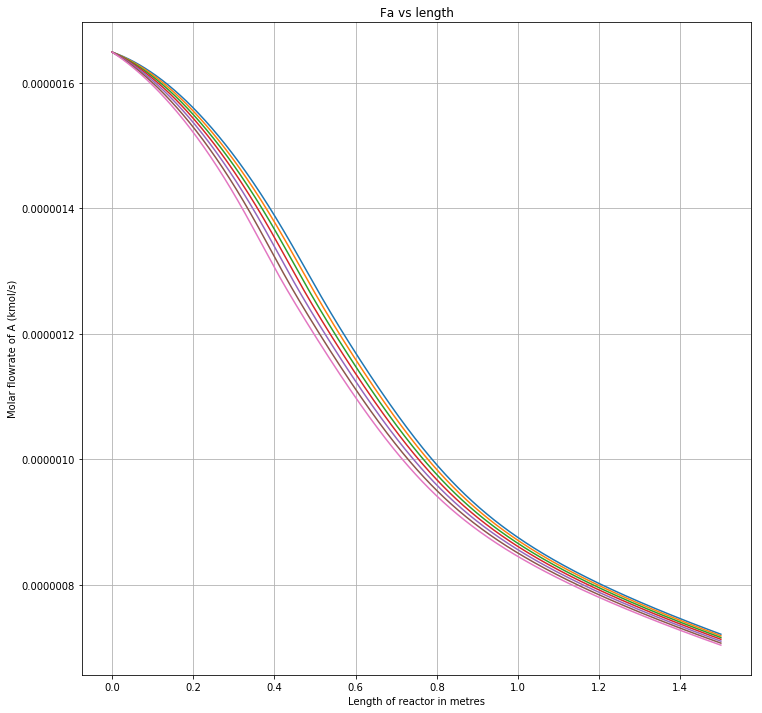

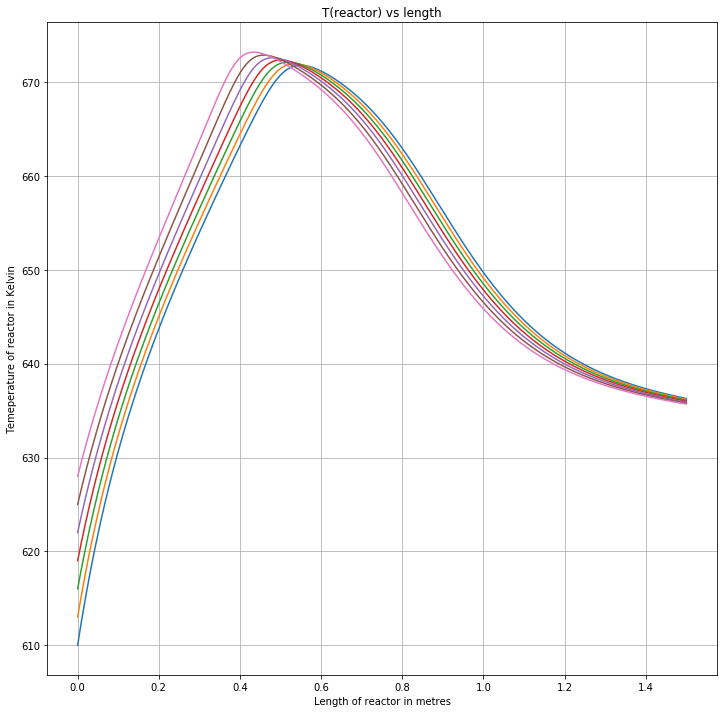

Around the centre of the reactor, the heat generated by the reaction is taken away by the coolant entirely.
. i.e.Qdot = dHrxn*rate. At this point, we get dT/dt = 0 and hence a maxima. This is also the point where the rate is the maximum


In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

km = 2.0822 #1/s
Ta = 625 #K
Tm = 625 #K
Pf = 101.325 #Kpa
L = 1.5 #m
R = 0.0125 #m
CA = np.pi*R*R #cross section area of PFR #m^2
V = CA*L #Volume of pfr #m^3
Cp = 0.992 #kJ/kgK
U = 0.373 #kJ/m2s
yxf = 0.019
E_R = 1.3636*10**4 #K
dHrxn0 = -1.284*10**6 #kJ/kmol
Q_rho = 2.6371/1000 #kg/s
MW = 30.387 #kg/kmol

# a is o-xylene and b is phthalic anhydride, while i is inert, which is air in this case

#Inlet quantities:
Fin = Q_rho/MW #kmol/s
Fain = yxf*Fin #kmol/s
Fbin = 0
Fi = Fin - Fain #kmol/s
Rgas = 8.314
Kc0 = 10**8
def noniso_PFR(Y,V,Tf):
    Fa,Fb,T = Y #unpacking variables
    #P = y * Pf #Pressure variation along V
    F = Fa + Fb + Fi #kmol/s #total molar flowrate
    v0 = Fin*Rgas*Tf/Pf
    v = v0*(F/Fin)*T/Tf

    #concentration
    Ca = Fa/v
    Cb = Fb/v
    
    #Temperature dependent paramenters
    #dHrxn = dHrxn0 + (Cp - Cp) * (T - Tm)
    Kc = Kc0 * np.exp(-dHrxn0 / Rgas * ( 1.0 / T - 1.0 / 625))
    kfwd = km * np.exp(-E_R * (1.0 / T - 1.0 / Tm))
    kback = kfwd/Kc
    Qdot = U*(2/R) * (Ta - T)
    
    #Reaction parameters
    ra = -kfwd * Ca + kback * Cb
    rb = -ra
    
    #Differential equations:
    dFadV = ra
    dFbdV = rb
    dTdV = (-dHrxn0 * rb + Qdot) /(Q_rho*Cp)
    #dydV = -alpha /(2 * y) * F / Fin
    #Number of variables unpacked by the first argument to the function should be equal to the number of differential equations returned
    
    return [dFadV, dFbdV, dTdV] #,dydV]

Tf = 610
Vspan = np.linspace(0,V,1000)
Yinit = [Fain,0,Tf]
i=0
width =12
height = 12
for Tf in range(610,631,3):
    Yinit = [Fain,0,Tf]
    sol = odeint(noniso_PFR,Yinit,Vspan,args=(Tf,))
    plt.figure(1,figsize = (height,width))
    plt.grid()
    plt.plot(Vspan/CA,sol[:,0],label=Tf)
    plt.ylabel("Molar flowrate of A (kmol/s)")
    plt.xlabel("Length of reactor in metres")
    plt.title("Fa vs length")

    plt.figure(2,figsize = (height,width))
    plt.grid()
    
    plt.plot(Vspan/CA,sol[:,2])
    plt.ylabel("Temeperature of reactor in Kelvin")
    plt.xlabel("Length of reactor in metres")
    plt.title("T(reactor) vs length")
plt.grid()    
plt.grid()
plt.show()
print("Around the centre of the reactor, the heat generated by the reaction is taken away by the coolant entirely.\n. i.e.Qdot = dHrxn*rate. At this point, we get dT/dt = 0 and hence a maxima. This is also the point where the rate is the maximum")

### What is the maximum conversion that you can get by adjusting the feed temperature and the cooling salt bath temperature ($T_A$)?

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

km = 2.0822 #1/s
Ta = 625 #K
Tm = 625 #K
Pf = 101.325 #Kpa
L = 1.5 #m
R = 0.0125 #m
CA = np.pi*R*R #cross section area of PFR #m^2
V = CA*L #Volume of pfr #m^3
Cp = 0.992 #kJ/kgK
U = 0.373 #kJ/m2s
yxf = 0.019
E_R = 1.3636*10**4 #K
dHrxn0 = -1.284*10**6 #kJ/kmol
Q_rho = 2.6371/1000 #kg/s
MW = 30.387 #kg/kmol

# a is o-xylene and b is phthalic anhydride, while i is inert, which is air in this case

#Inlet quantities:
Fin = Q_rho/MW #kmol/s
Fain = yxf*Fin #kmol/s
Fbin = 0
Fi = Fin - Fain #kmol/s
Rgas = 8.314
Kc0 = 10**8
def noniso_PFR(Y,V,Tf,Ta):
    Fa,Fb,T = Y #unpacking variables
    #P = y * Pf #Pressure variation along V
    F = Fa + Fb + Fi #kmol/s #total molar flowrate
    v0 = Fin*Rgas*Tf/Pf
    v = v0*(F/Fin)*T/Tf

    #concentration
    Ca = Fa/v
    Cb = Fb/v
    
    #Temperature dependent paramenters
    #dHrxn = dHrxn0 + (Cp - Cp) * (T - Tm)
    Kc = Kc0 * np.exp(-dHrxn0 / Rgas * ( 1.0 / T - 1.0 / 625))
    kfwd = km * np.exp(-E_R * (1.0 / T - 1.0 / Tm))
    kback = kfwd/Kc
    Qdot = U*(2/R) * (Ta - T)
    
    #Reaction parameters
    ra = -kfwd * Ca + kback * Cb
    rb = -ra
    
    #Differential equations:
    dFadV = ra
    dFbdV = rb
    dTdV = (-dHrxn0 * rb + Qdot) /(Q_rho*Cp)
    #dydV = -alpha /(2 * y) * F / Fin
    #Number of variables unpacked by the first argument to the function should be equal to the number of differential equations returned
    
    return [dFadV, dFbdV, dTdV] #,dydV]

Tf = 610
Vspan = np.linspace(0,V,1000)
Yinit = [Fain,0,Tf]
i=0
width =12
height = 12

X = np.empty([50,50])
i=0
j=0
for i,Ta in enumerate(np.linspace(630,659)):
    for j,Tf in enumerate(np.linspace(630,659)):
        Vspan = np.linspace(0,V,1000)
        Yinit = [Fain,0,Tf]
        sol = odeint(noniso_PFR,Yinit,Vspan,args = (Tf,Ta,))
        Faarr = sol[:,0]
        Faout = Faarr[-1]
        X[i][j] = (Faout-Fain)/(Fain*-1)
       
        
        
x_max = np.amax(X)
print("The maximum conversion is {0:1.3f}".format(x_max))

a = np.where(X==x_max)
#print(a)
Trange = np.linspace(630,659)
print("The maxima occurs when Tcoolant is",Trange[13],"K and Tfeed is",Trange[45],"K")

The maximum conversion is 0.658
The maxima occurs when Tcoolant is 637.693877551 K and Tfeed is 656.632653061 K
